In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
theta  = np.pi/3
roo = np.array([[7],[5]])

In [7]:
phi = np.linspace(0, 2*np.pi,4)
B = np.array([3*np.cos(phi), 6*np.sin(phi)])
B

array([[  3.00000000e+00,  -1.50000000e+00,  -1.50000000e+00,
          3.00000000e+00],
       [  0.00000000e+00,   5.19615242e+00,  -5.19615242e+00,
         -1.46957616e-15]])

In [10]:
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
T = np.vstack((np.hstack((R,roo)), np.array([0,0,1])))
T

array([[ 0.5      , -0.8660254,  7.       ],
       [ 0.8660254,  0.5      ,  5.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [12]:
Baum = np.vstack((B,np.ones(np.shape(B)[1])))
Baum

array([[  3.00000000e+00,  -1.50000000e+00,  -1.50000000e+00,
          3.00000000e+00],
       [  0.00000000e+00,   5.19615242e+00,  -5.19615242e+00,
         -1.46957616e-15],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00]])

In [14]:
BrotTr = T@Baum
BrotTr

array([[  8.5       ,   1.75      ,  10.75      ,   8.5       ],
       [  7.59807621,   6.29903811,   1.10288568,   7.59807621],
       [  1.        ,   1.        ,   1.        ,   1.        ]])

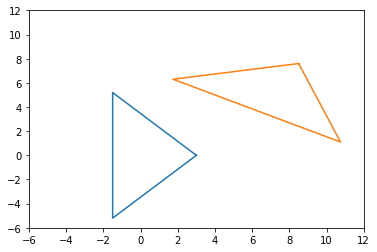

In [16]:
plt.figure()
plt.plot(B[0,:],B[1,:],BrotTr[0,:],BrotTr[1,:])
plt.xlim((-6, 12))
plt.ylim((-6, 12))
plt.show()

<IPython.core.display.Javascript object>


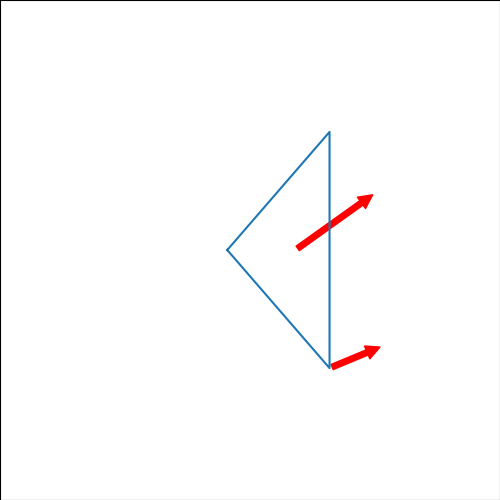

In [33]:
%matplotlib notebook
from matplotlib.patches import FancyArrowPatch
from matplotlib.animation import FuncAnimation

t = np.linspace(0,10,10)

omega = np.pi/10
voo = np.array([[0.7],[0.5]])

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])    
ax.axis("on")
plt.rcParams['figure.figsize']=5,5

def run(i):
    theta = omega*t[i]
    roo = voo*t[i]
    
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    T = np.vstack((np.hstack((R, roo)), np.array([0,0,1])))
    Brot = R@B
    BrotTr = T@Baum
    plt.plot(BrotTr[0,:],BrotTr[1,:],hold=False)
    
    point = 1
    v = voo + np.array([[-omega*Brot[1,point]],[omega*Brot[0,point]]])
    vec1 = FancyArrowPatch(np.array([float(BrotTr[0,point]), float(BrotTr[1,point])]),
                           np.array([float(BrotTr[0,point]+v[0]), float(BrotTr[1,point]+v[1])]),mutation_scale=20,color='r')
    
    
    ax.add_artist(vec1)
    
    vec2 = FancyArrowPatch(np.array([float(roo[0]), float(roo[1])]),
                           np.array([float(roo[0]+5*voo[0]), float(roo[1]+5*voo[1])]),mutation_scale=20,color='r')
    
    
    ax.add_artist(vec2)
    
    
    plt.xlim((-6, 16))
    plt.ylim((-6, 16))
    
    
ani = FuncAnimation(fig, run, frames = 10,repeat=False,  interval =500)
plt.show()

## Problems